## Twitter Sentiment Analytics for 5/10 - 6/7

In [2]:
import csv 
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import dateutil.parser as parser
%matplotlib inline

In [3]:
from IPython.core.display import HTML
css = open('css/style-table.css').read() + open('css/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [6]:
df = pd.read_csv('data/5_10-6_1-sentiment.csv', quoting=csv.QUOTE_NONE, encoding='utf-8')

In [7]:
dfnew = pd.read_csv('data/6_2-6_7-sentiment.csv', quoting=csv.QUOTE_NONE, encoding='utf-8')

In [40]:
df.head(1)

,id,date,text,retweet_count,favorite_count,coordinates_lat,coordinates_long,user_screen_name,user_created_at,user_location,user_description,user_followers_count,user_friends_count,user_listed_count,user_favorites_count,user_statuses_count,sentiment
0,737210383463763968,Mon May 30 02:13:46 PDT 2016,Bernie Sanders gets a lesson on California far...,0,0,NaN,NaN,CarponCoby,Wed Apr 29 13:13:10 PDT 2015,Long Island New York,My ego won't let me bio and it's my own fault.,40,205,1,65,249,0.0


In [14]:
len(df)

1007840

In [15]:
len(dfnew)

267291

In [12]:
df = df.append(dfnew)

In [18]:
df = df.drop_duplicates(['user_screen_name'], keep='last')

In [19]:
len(df)

303077

### Users with Location

#### Specify Location

In [20]:
location = df[(df['user_location'].notnull())]

In [21]:
len(location)

213439

## Function

In [89]:
real_data = {}    # [clinton, sanders]

real_data['AL'] = [77.8, 19.2]
real_data['AK'] = [18.4, 81.6]
real_data['AZ'] = [57.6, 39.9]
real_data['AR'] = [66.3, 29.7]
real_data['CA'] = [55.8, 43.2]
real_data['CO'] = [40.3, 59.0]
real_data['CT'] = [51.8, 46.4]
real_data['CA'] = [55.8, 43.2]
real_data['DE'] = [59.8, 39.2]
real_data['DC'] = [78.7, 21.1]
real_data['FL'] = [64.4, 33.3]
real_data['GA'] = [71.3, 28.2]
real_data['HI'] = [30.0, 69.8]
real_data['ID'] = [21.2, 78.0]
real_data['IA'] = [49.9, 49.6]
real_data['IN'] = [47.5, 52.5]
real_data['IL'] = [50.5, 48.7]
real_data['KS'] = [32.3, 67.7]
real_data['KY'] = [46.8, 46.3]
real_data['LA'] = [71.1, 23.2]
real_data['ME'] = [35.5, 64.3]
real_data['MD'] = [63.0, 33.2]
real_data['MA'] = [50.1, 48.7]
real_data['MI'] = [48.3, 49.8]
real_data['MN'] = [38.4, 61.6]
real_data['MS'] = [82.6, 16.5]
real_data['MO'] = [49.6, 49.4]
real_data['MT'] = [51.1, 44.6]
real_data['NE'] = [42.9, 57.1]
real_data['NV'] = [52.6, 47.3]
real_data['NH'] = [38.0, 60.4]
real_data['NJ'] = [63.2, 36.8]
real_data['NM'] = [51.5, 48.5]
real_data['NY'] = [58.0, 42.0]
real_data['NC'] = [54.6, 40.8]
real_data['ND'] = [25.6, 64.2]
real_data['OH'] = [56.5, 42.7]
real_data['OK'] = [41.5, 51.9]
real_data['OR'] = [44.0, 56.0]
real_data['PA'] = [55.6, 43.6]
real_data['RI'] = [43.3, 55.0]
real_data['SD'] = [51.0, 49.0]
real_data['TN'] = [66.1, 32.4]
real_data['TX'] = [65.2, 33.2]
real_data['UT'] = [20.3, 79.3]
real_data['VT'] = [13.6, 81.6]
real_data['VA'] = [64.3, 35.2]
real_data['WA'] = [27.1, 72.7]
real_data['WI'] = [43.1, 56.6]
real_data['WY'] = [44.3, 55.7]

In [57]:
def getStateAcronym(regex):
    return regex.split('|')[0]
def getStateName(regex):
    return regex.split('|')[1]

In [58]:
def analysis(regex):
    state = getStateName(regex)
    dfs = location[location['user_location'].str.contains(state, na=False)]
    print 'People who talked about state ' + regex + ': ' + str(len(dfs))
    
    show_candidate(dfs, 'Sanders', 1)
    show_candidate(dfs, 'Clinton', 2)
    show_candidate(dfs, 'Trump', 3)
    
    plt.tight_layout()
    plt.show()
    
    show_democrat(dfs,regex)


In [59]:
def show_candidate(dfs, candidate, i):
    
    
    # define data for sanders
    candidate_str = '(?i)' + candidate
    dfc = dfs[dfs['text'].str.contains(candidate_str, na=False)]
    pos = len(dfc[dfc['sentiment'] > 0])
    neg = len(dfc[dfc['sentiment'] < 0])
    
    pos_r = round(100.0 * pos / len(dfc), 2)
    neg_r = round(100.0 * neg / len(dfc), 2)
    
    sizes = [pos_r, neg_r]

    #define colors
    colors = ['lightcoral', 'lightskyblue']
    labels = ['pos: ' + str(pos_r), 'neg: ' + str(neg_r)]
    
    # draw figure for candidate
    ax = plt.subplot(1, 3, i)
    patches, texts = ax.pie(sizes, labels=labels, colors=colors, shadow=True)
    ax.legend(patches, labels, loc="best", title=candidate)
    
    ax.axis('equal')
    
    print candidate + ' - Total: ' + str(len(dfc)) + '\nPos: ' + str(pos) + ', Neg: ' + str(neg)
    print ''
    
    

In [60]:
def show_democrat(dfs, regex):
    
    # get data for sanders
    df_sanders = dfs[dfs['text'].str.contains('(?i)Sanders', na=False)]
    sanders_pos = len(df_sanders[df_sanders['sentiment'] > 0])
    sanders_tot = len(df_sanders)
    sanders_ratio = sanders_pos * 100.0 / sanders_tot
    
    # get data for clinton
    df_clinton = dfs[dfs['text'].str.contains('(?i)Clinton', na=False)]
    clinton_pos = len(df_clinton[df_clinton['sentiment'] > 0])
    clinton_tot = len(df_clinton)
    clinton_ratio = clinton_pos * 100.0 / clinton_tot
        
#     print 'Sentiment - Clinton: ' + str(round(clinton_ratio,1)) +  ', Sanders: ' + str(round(sanders_ratio,1))
        
    # for drawing
    colors = ['lightskyblue', 'yellowgreen']
    labels = ['Clinton', 'Sanders']
#     sizes = [clinton_pos, sanders_pos]
    sizes = [clinton_ratio, sanders_ratio]

    ax1 = plt.subplot(1,2,1)
    patches, texts, autotext = ax1.pie(sizes, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%')
    ax1.legend(patches, labels, loc="best", title="Sentiment Analysis")
    ax1.axis('equal')
    
    ax2 = plt.subplot(1,2,2)
    state_key = getStateAcronym(regex)
    
    if state_key in real_data:
        data = real_data[state_key]
        patches, texts, autotext = ax2.pie(data, labels=labels, 
                                       colors=colors, shadow=True, autopct='%1.1f%%')
        ax2.legend(patches, labels, loc="best", title="Real Data")
        ax2.axis('equal')
#         print 'RealData - Clinton: ' + str(data[0]) +  ', Sanders: ' + str(data[1])
    
    
    
    plt.tight_layout()
    plt.show()
    

### RESULTS

## Alabama

People who talked about state AL|Alabama: 474
Sanders - Total: 57
Pos: 23, Neg: 11

Clinton - Total: 31
Pos: 11, Neg: 6

Trump - Total: 256
Pos: 76, Neg: 39



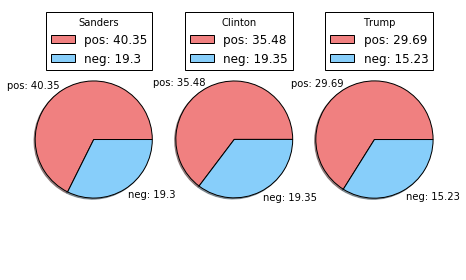

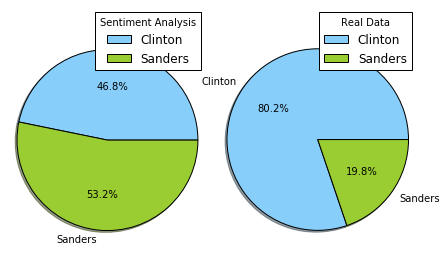

In [61]:
analysis('AL|Alabama')

## Alaska

People who talked about state AK|Alaska: 139
Sanders - Total: 21
Pos: 5, Neg: 1

Clinton - Total: 14
Pos: 0, Neg: 0

Trump - Total: 71
Pos: 16, Neg: 16



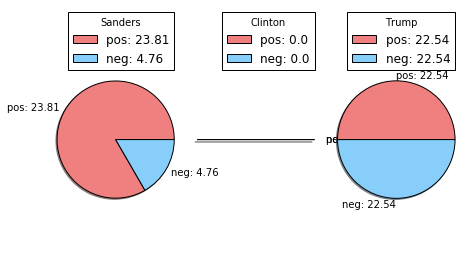

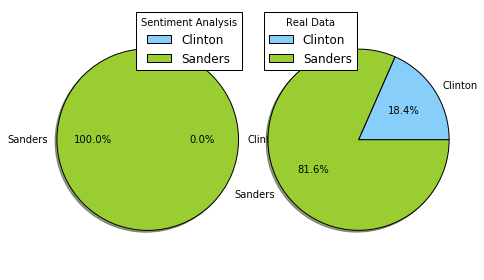

In [62]:
analysis('AK|Alaska')

## Arizona

People who talked about state AZ|Arizona: 858
Sanders - Total: 133
Pos: 53, Neg: 21

Clinton - Total: 81
Pos: 27, Neg: 16

Trump - Total: 423
Pos: 140, Neg: 67



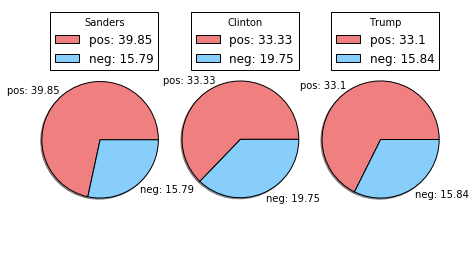

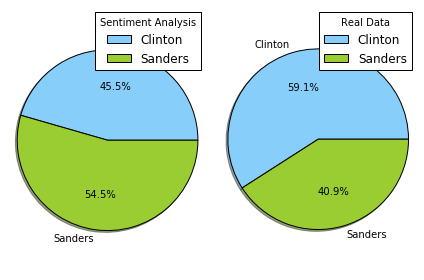

In [63]:
analysis('AZ|Arizona')

## Arkansas

People who talked about state AR|Arkansas: 280
Sanders - Total: 34
Pos: 11, Neg: 7

Clinton - Total: 14
Pos: 5, Neg: 6

Trump - Total: 140
Pos: 46, Neg: 26



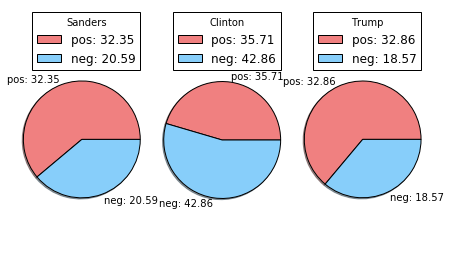

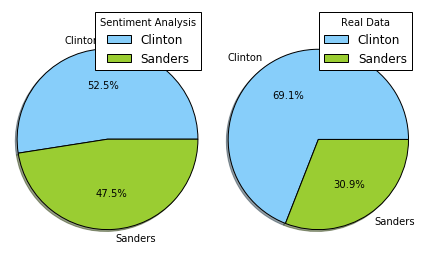

In [64]:
analysis('AR|Arkansas')

## California

People who talked about state CA|California: 4678
Sanders - Total: 1202
Pos: 428, Neg: 155

Clinton - Total: 360
Pos: 104, Neg: 73

Trump - Total: 2122
Pos: 688, Neg: 439



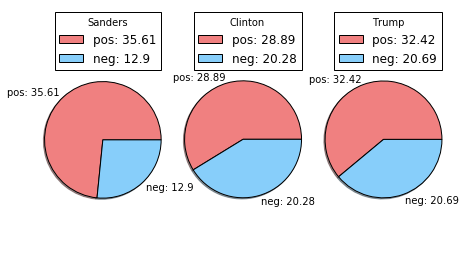

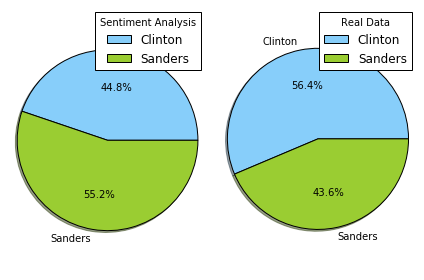

In [65]:
analysis('CA|California')

## Colorado

People who talked about state CO|Colorado: 857
Sanders - Total: 139
Pos: 45, Neg: 20

Clinton - Total: 60
Pos: 19, Neg: 11

Trump - Total: 396
Pos: 123, Neg: 85



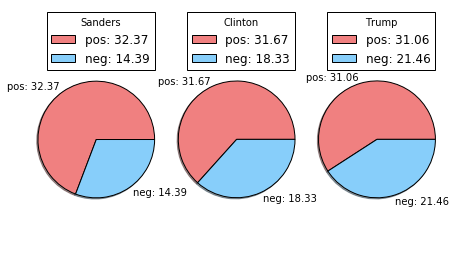

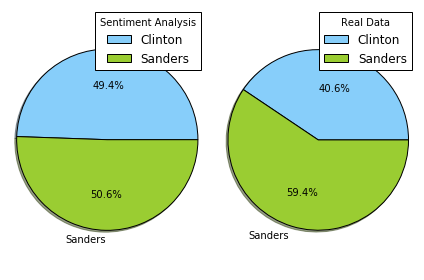

In [66]:
analysis('CO|Colorado')

## Connecticut

People who talked about state CT|Connecticut: 359
Sanders - Total: 63
Pos: 14, Neg: 8

Clinton - Total: 34
Pos: 12, Neg: 5

Trump - Total: 179
Pos: 70, Neg: 27



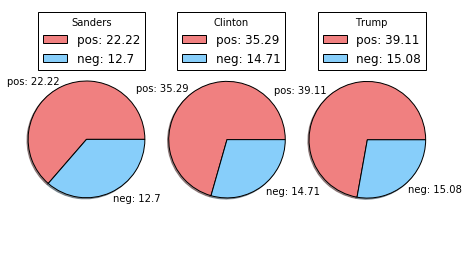

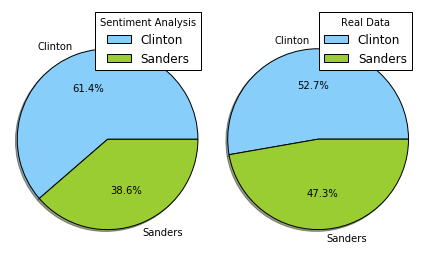

In [67]:
analysis('CT|Connecticut')

## Delaware

People who talked about state DE|Delaware: 123
Sanders - Total: 13
Pos: 6, Neg: 2

Clinton - Total: 5
Pos: 2, Neg: 0

Trump - Total: 67
Pos: 23, Neg: 13



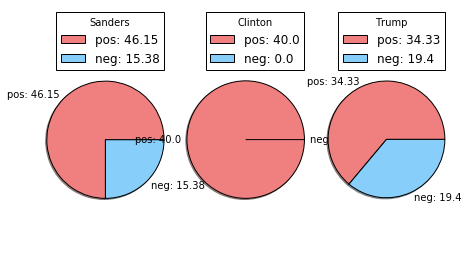

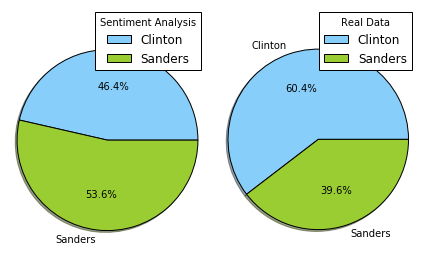

In [68]:
analysis('DE|Delaware')

## Washington D.C

People who talked about state DC|D.C.|Washington D.C: 1175
Sanders - Total: 124
Pos: 48, Neg: 18

Clinton - Total: 94
Pos: 38, Neg: 14

Trump - Total: 617
Pos: 207, Neg: 111



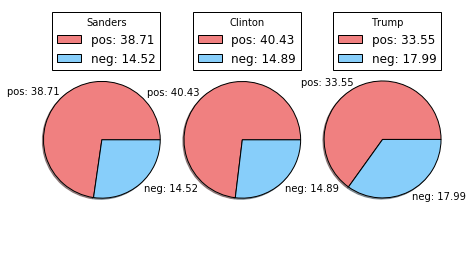

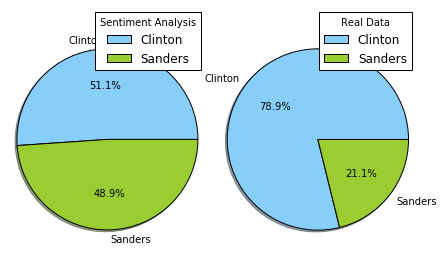

In [69]:
analysis('DC|D.C.|Washington D.C')

## Florida

People who talked about state FL|Florida: 2840
Sanders - Total: 384
Pos: 115, Neg: 64

Clinton - Total: 239
Pos: 74, Neg: 47

Trump - Total: 1581
Pos: 503, Neg: 278



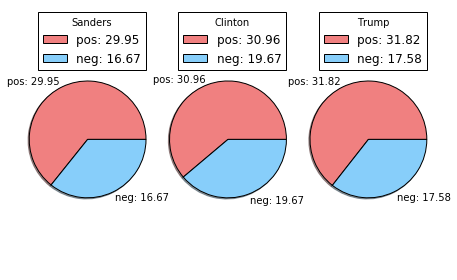

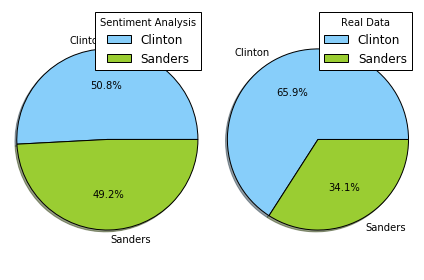

In [70]:
analysis('FL|Florida')

## Georgia

People who talked about state GA|Georgia: 831
Sanders - Total: 98
Pos: 34, Neg: 20

Clinton - Total: 58
Pos: 15, Neg: 14

Trump - Total: 453
Pos: 147, Neg: 101



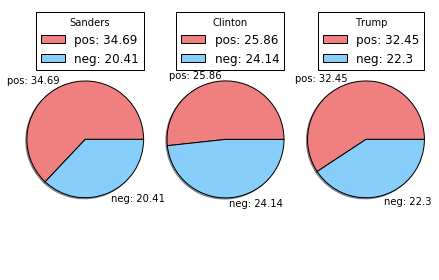

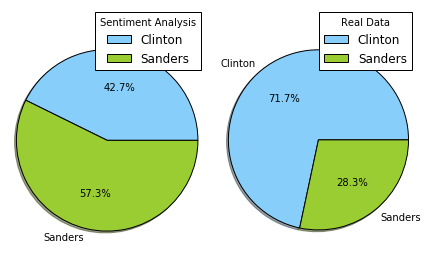

In [71]:
analysis('GA|Georgia')

## Hawaii

People who talked about state HI|Hawaii: 221
Sanders - Total: 44
Pos: 9, Neg: 6

Clinton - Total: 15
Pos: 3, Neg: 2

Trump - Total: 99
Pos: 31, Neg: 23



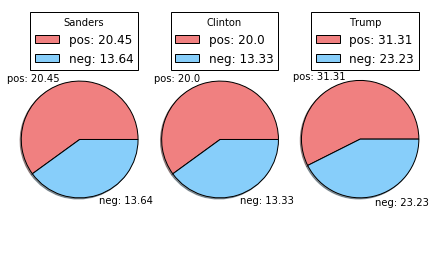

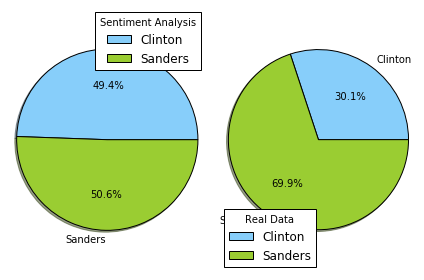

In [72]:
analysis('HI|Hawaii')

## Idaho

People who talked about state ID|Idaho: 166
Sanders - Total: 19
Pos: 4, Neg: 7

Clinton - Total: 13
Pos: 2, Neg: 5

Trump - Total: 72
Pos: 21, Neg: 13



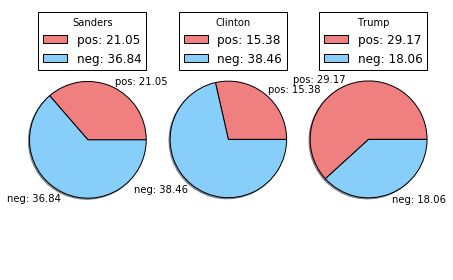

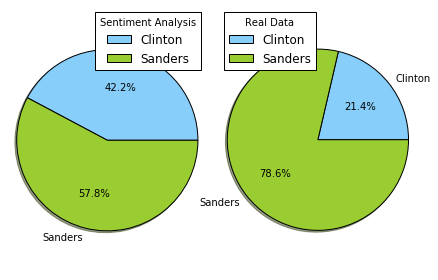

In [73]:
analysis('ID|Idaho')

## Illinois

People who talked about state IL|Illinois: 666
Sanders - Total: 101
Pos: 31, Neg: 24

Clinton - Total: 49
Pos: 11, Neg: 12

Trump - Total: 301
Pos: 90, Neg: 65



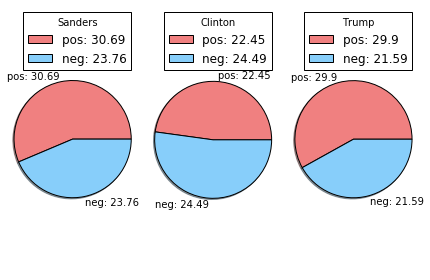

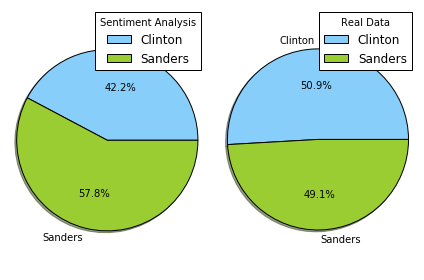

In [74]:
analysis('IL|Illinois')

## Indiana

People who talked about state IN|Indiana: 969
Sanders - Total: 133
Pos: 40, Neg: 22

Clinton - Total: 67
Pos: 23, Neg: 8

Trump - Total: 493
Pos: 150, Neg: 103



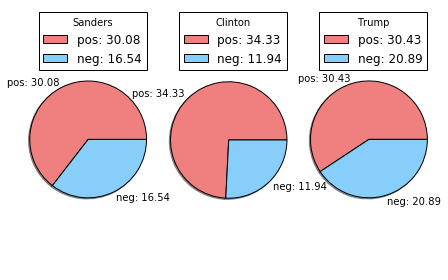

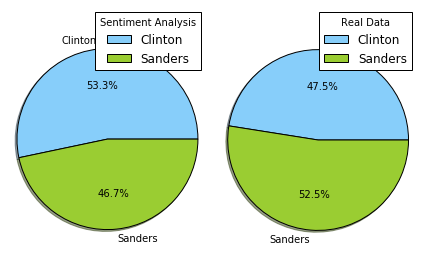

In [75]:
analysis('IN|Indiana')

## Iowa

People who talked about state IA|Iowa: 444
Sanders - Total: 61
Pos: 30, Neg: 9

Clinton - Total: 19
Pos: 9, Neg: 2

Trump - Total: 221
Pos: 80, Neg: 35



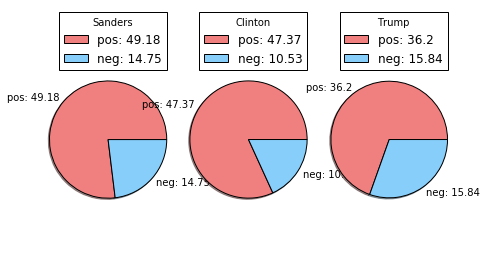

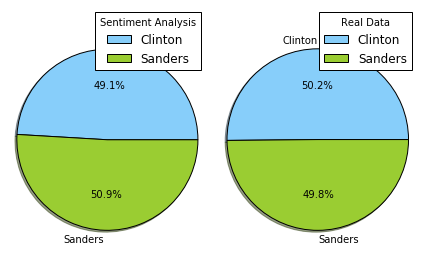

In [76]:
analysis('IA|Iowa')

## Kansas

People who talked about state KS|Kansas: 572
Sanders - Total: 84
Pos: 37, Neg: 13

Clinton - Total: 44
Pos: 16, Neg: 7

Trump - Total: 271
Pos: 82, Neg: 50



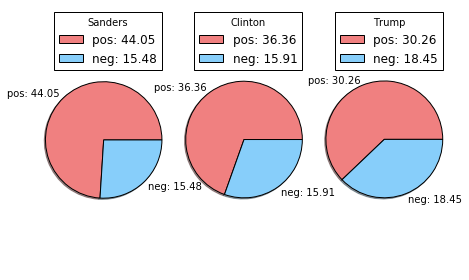

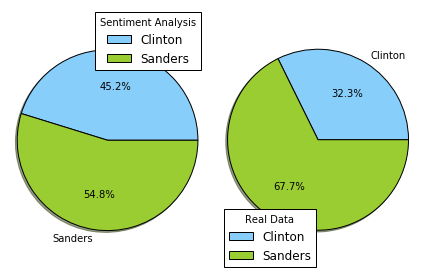

In [77]:
analysis('KS|Kansas')

## Kentucky

People who talked about state KY|Kentucky: 384
Sanders - Total: 60
Pos: 20, Neg: 12

Clinton - Total: 24
Pos: 10, Neg: 9

Trump - Total: 188
Pos: 59, Neg: 38



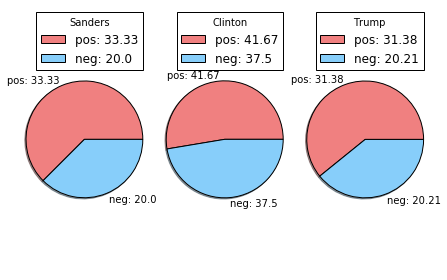

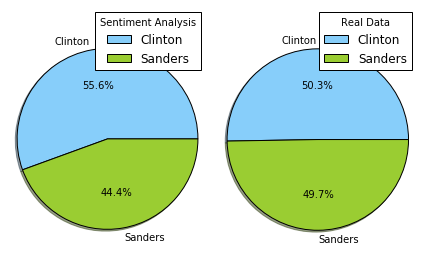

In [78]:
analysis('KY|Kentucky')

## Louisiana

People who talked about state LA|Louisiana: 328
Sanders - Total: 42
Pos: 11, Neg: 7

Clinton - Total: 20
Pos: 7, Neg: 6

Trump - Total: 171
Pos: 48, Neg: 42



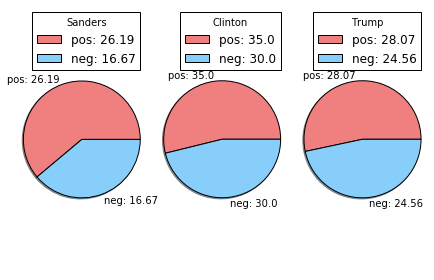

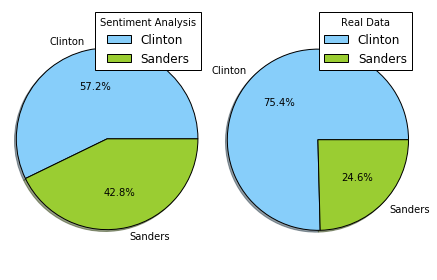

In [79]:
analysis('LA|Louisiana')

## Maine

People who talked about state ME|Maine: 283
Sanders - Total: 50
Pos: 12, Neg: 10

Clinton - Total: 23
Pos: 7, Neg: 6

Trump - Total: 133
Pos: 37, Neg: 25



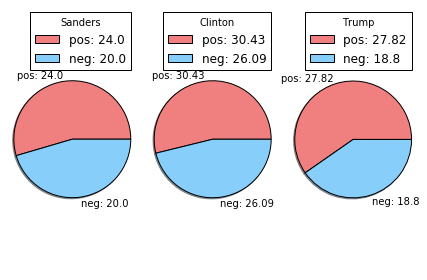

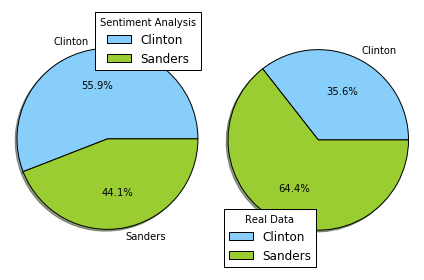

In [80]:
analysis('ME|Maine')

## Maryland

People who talked about state MD|Maryland: 630
Sanders - Total: 85
Pos: 31, Neg: 15

Clinton - Total: 37
Pos: 17, Neg: 7

Trump - Total: 288
Pos: 111, Neg: 50



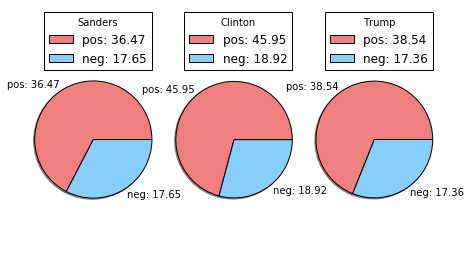

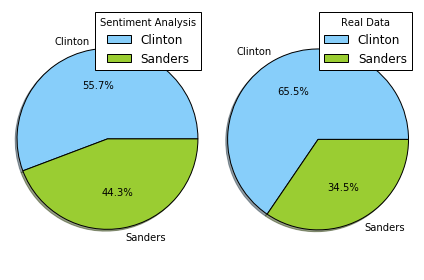

In [81]:
analysis('MD|Maryland')

## Massachusetts

People who talked about state MA|Massachusetts: 573
Sanders - Total: 98
Pos: 47, Neg: 13

Clinton - Total: 49
Pos: 18, Neg: 9

Trump - Total: 286
Pos: 92, Neg: 62



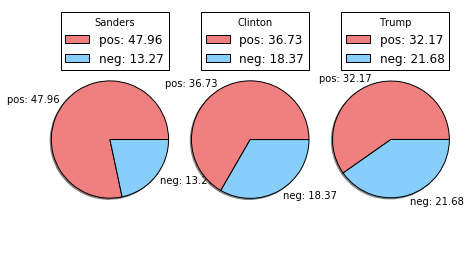

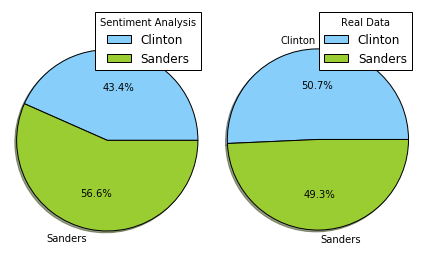

In [82]:
analysis('MA|Massachusetts')

## Michigan

People who talked about state MI|Michigan: 1019
Sanders - Total: 151
Pos: 50, Neg: 28

Clinton - Total: 69
Pos: 24, Neg: 15

Trump - Total: 506
Pos: 172, Neg: 93



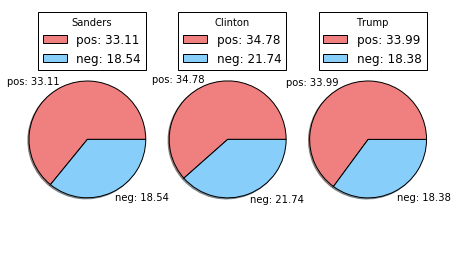

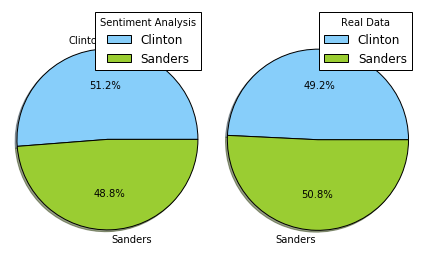

In [85]:
analysis('MI|Michigan')

## Minnesota

People who talked about state MN|Minnesota: 489
Sanders - Total: 79
Pos: 37, Neg: 5

Clinton - Total: 55
Pos: 21, Neg: 9

Trump - Total: 231
Pos: 63, Neg: 48



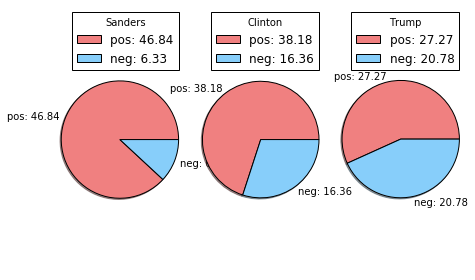

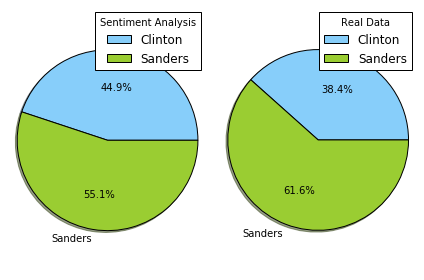

In [90]:
analysis('MN|Minnesota')

## Mississippi

People who talked about state MS|Mississippi: 174
Sanders - Total: 18
Pos: 6, Neg: 2

Clinton - Total: 10
Pos: 3, Neg: 1

Trump - Total: 91
Pos: 26, Neg: 12



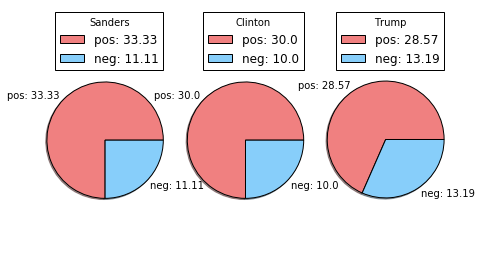

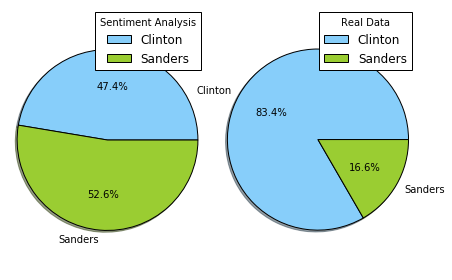

In [91]:
analysis('MS|Mississippi')

## Missouri

People who talked about state MO|Missouri: 439
Sanders - Total: 54
Pos: 17, Neg: 10

Clinton - Total: 37
Pos: 11, Neg: 6

Trump - Total: 210
Pos: 64, Neg: 40



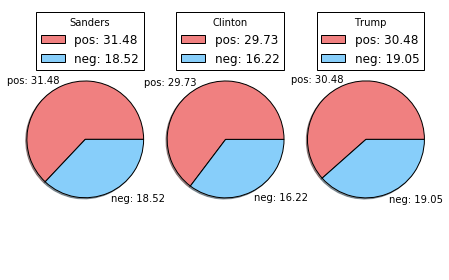

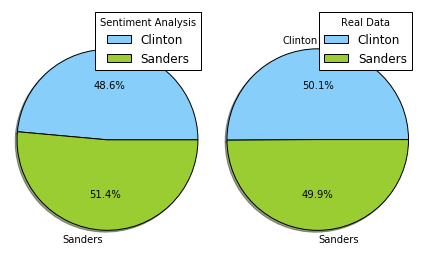

In [92]:
analysis('MO|Missouri')

## Montana

People who talked about state MT|Montana: 174
Sanders - Total: 45
Pos: 17, Neg: 4

Clinton - Total: 11
Pos: 1, Neg: 2

Trump - Total: 79
Pos: 24, Neg: 13



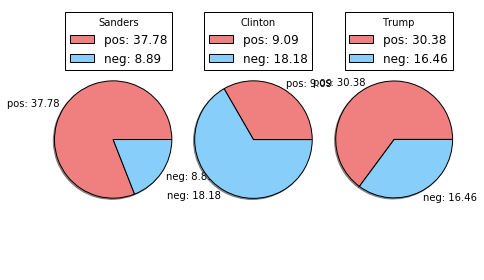

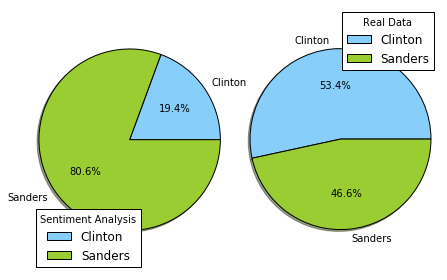

In [93]:
analysis('MT|Montana')

## Nebraska

People who talked about state NE|Nebraska: 179
Sanders - Total: 29
Pos: 15, Neg: 1

Clinton - Total: 16
Pos: 9, Neg: 2

Trump - Total: 88
Pos: 28, Neg: 18



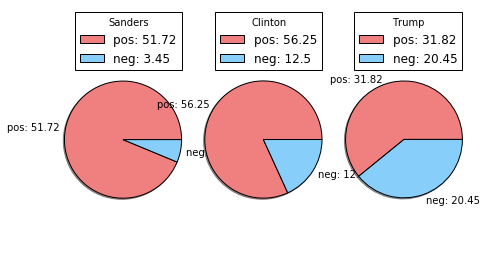

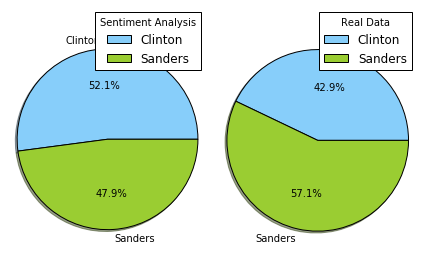

In [94]:
analysis('NE|Nebraska')

## New Hampshire

People who talked about state NH|New Hampshire: 192
Sanders - Total: 30
Pos: 12, Neg: 6

Clinton - Total: 15
Pos: 3, Neg: 3

Trump - Total: 94
Pos: 35, Neg: 12



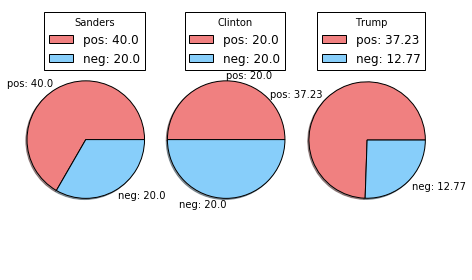

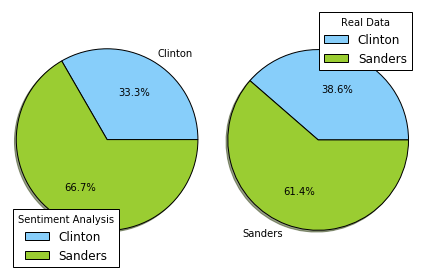

In [95]:
analysis('NH|New Hampshire')

## New Jersy

People who talked about state NJ|New Jersey: 1051
Sanders - Total: 159
Pos: 65, Neg: 25

Clinton - Total: 87
Pos: 26, Neg: 19

Trump - Total: 554
Pos: 188, Neg: 120



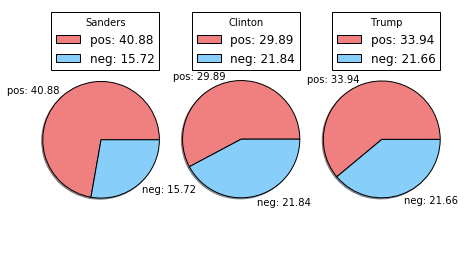

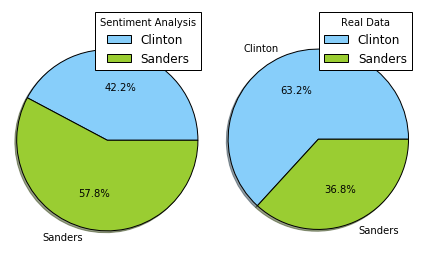

In [96]:
analysis('NJ|New Jersey')

## New Mexico

People who talked about state NM|New Mexico: 233
Sanders - Total: 54
Pos: 23, Neg: 9

Clinton - Total: 10
Pos: 5, Neg: 1

Trump - Total: 99
Pos: 31, Neg: 26



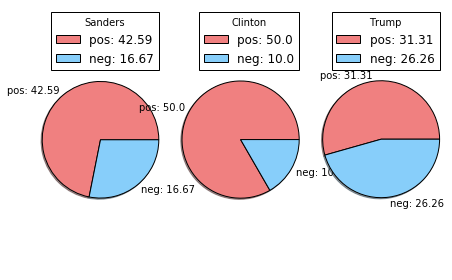

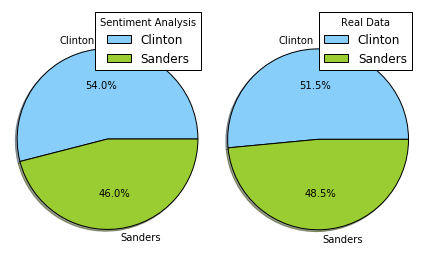

In [97]:
analysis('NM|New Mexico')

## New York

People who talked about state NY|New York: 6621
Sanders - Total: 1010
Pos: 370, Neg: 166

Clinton - Total: 490
Pos: 170, Neg: 107

Trump - Total: 3751
Pos: 1147, Neg: 736



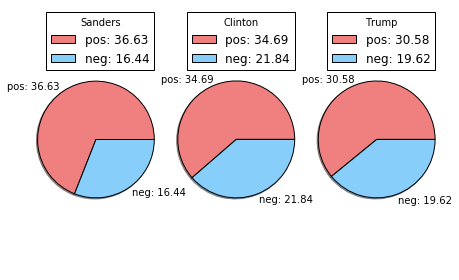

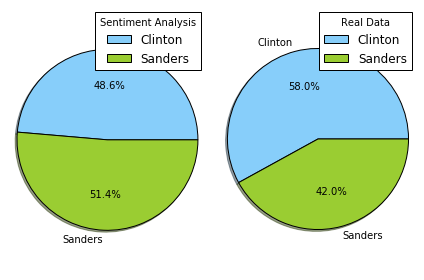

In [98]:
analysis('NY|New York')

## North Carolina

People who talked about state NC|North Carolina: 761
Sanders - Total: 111
Pos: 39, Neg: 19

Clinton - Total: 54
Pos: 19, Neg: 8

Trump - Total: 375
Pos: 150, Neg: 72



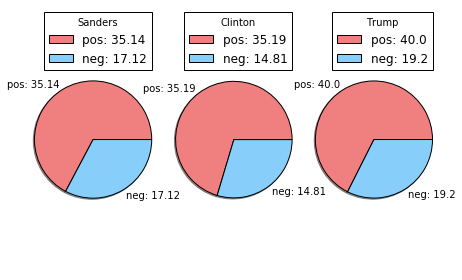

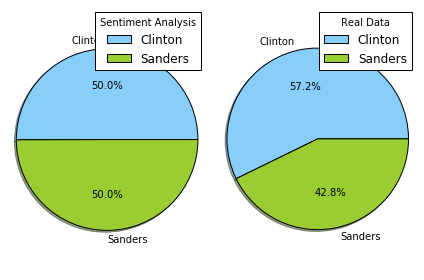

In [99]:
analysis('NC|North Carolina')

## North Dakota

People who talked about state ND|North Dakota: 60
Sanders - Total: 14
Pos: 5, Neg: 2

Clinton - Total: 4
Pos: 2, Neg: 1

Trump - Total: 30
Pos: 11, Neg: 6



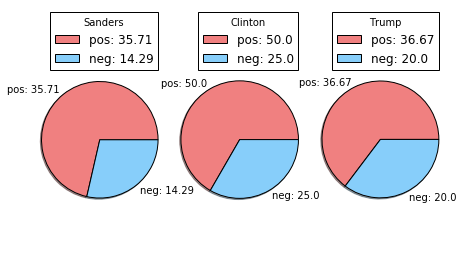

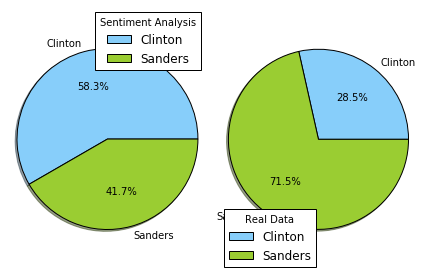

In [100]:
analysis('ND|North Dakota')

## Ohio

People who talked about state OH|Ohio: 1374
Sanders - Total: 184
Pos: 63, Neg: 39

Clinton - Total: 96
Pos: 34, Neg: 14

Trump - Total: 715
Pos: 217, Neg: 128



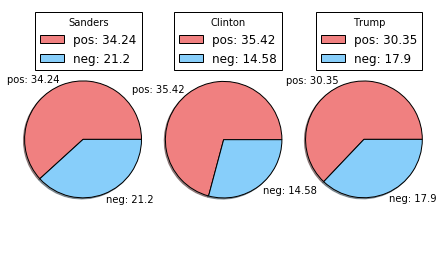

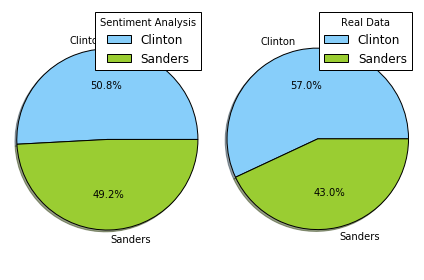

In [101]:
analysis('OH|Ohio')

## Oklahoma

People who talked about state OK|Oklahoma: 487
Sanders - Total: 74
Pos: 21, Neg: 11

Clinton - Total: 41
Pos: 10, Neg: 11

Trump - Total: 224
Pos: 77, Neg: 54



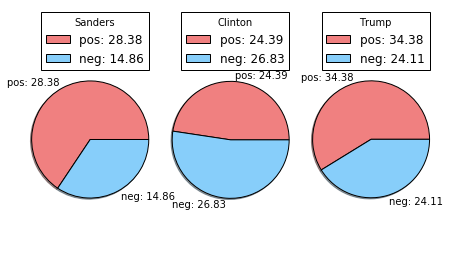

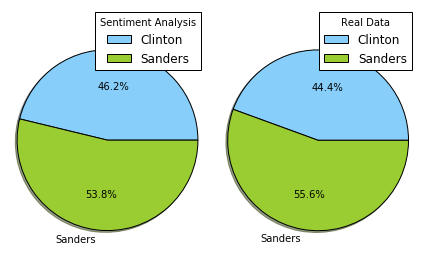

In [102]:
analysis('OK|Oklahoma')

## Oregon

People who talked about state OR|Oregon: 794
Sanders - Total: 176
Pos: 68, Neg: 19

Clinton - Total: 55
Pos: 22, Neg: 9

Trump - Total: 318
Pos: 103, Neg: 67



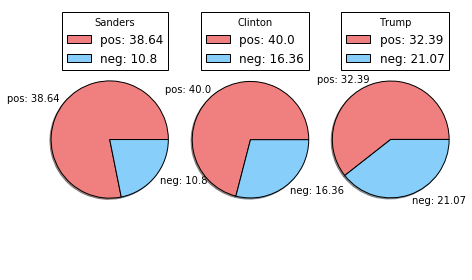

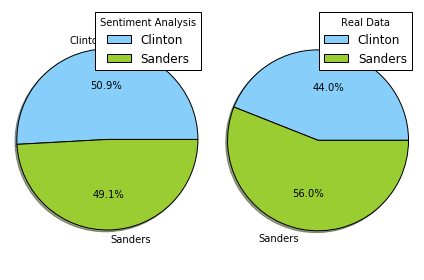

In [103]:
analysis('OR|Oregon')

## Pennsylvania

People who talked about state PA|Pennsylvania: 666
Sanders - Total: 99
Pos: 37, Neg: 17

Clinton - Total: 63
Pos: 23, Neg: 11

Trump - Total: 331
Pos: 117, Neg: 61



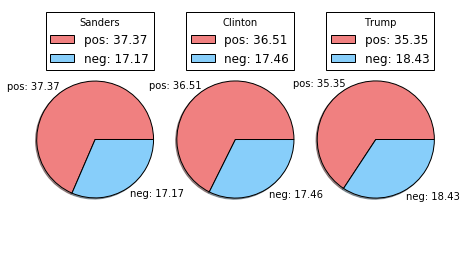

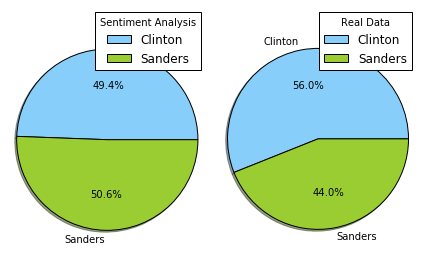

In [104]:
analysis('PA|Pennsylvania')

## Rhode Island

People who talked about state RI|Rhode Island: 129
Sanders - Total: 21
Pos: 10, Neg: 5

Clinton - Total: 14
Pos: 5, Neg: 6

Trump - Total: 61
Pos: 23, Neg: 12



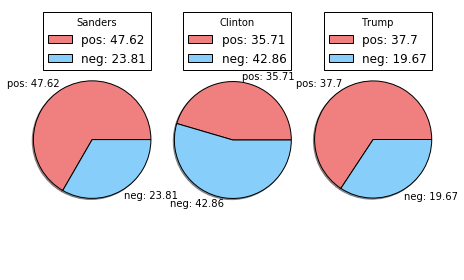

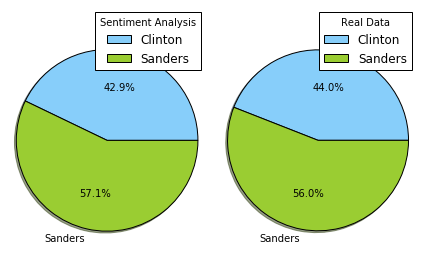

In [105]:
analysis('RI|Rhode Island')

## South Carolina

People who talked about state SC|South Carolina: 392
Sanders - Total: 53
Pos: 23, Neg: 8

Clinton - Total: 28
Pos: 10, Neg: 4

Trump - Total: 201
Pos: 62, Neg: 49



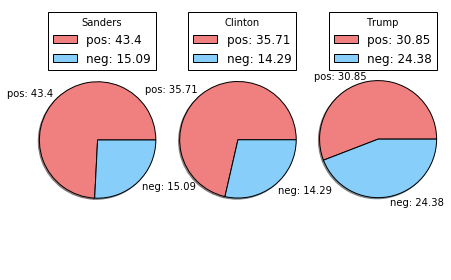

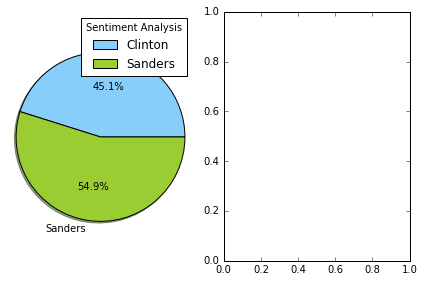

In [106]:
analysis('SC|South Carolina')

## South Dakota

People who talked about state SD|South Dakota: 59
Sanders - Total: 18
Pos: 7, Neg: 2

Clinton - Total: 3
Pos: 2, Neg: 0

Trump - Total: 26
Pos: 11, Neg: 4



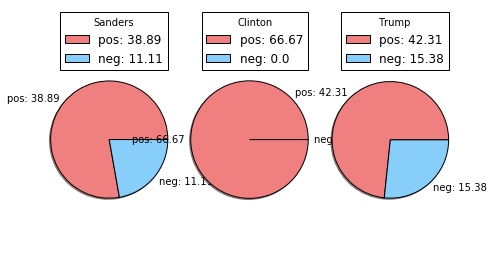

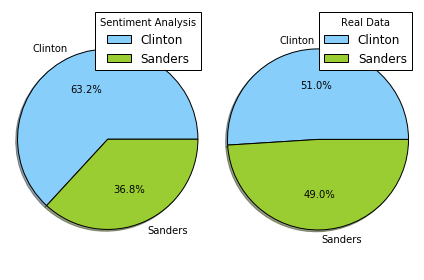

In [108]:
analysis('SD|South Dakota')

## Tennessee

People who talked about state TN|Tennessee: 472
Sanders - Total: 69
Pos: 24, Neg: 10

Clinton - Total: 30
Pos: 7, Neg: 6

Trump - Total: 216
Pos: 74, Neg: 44



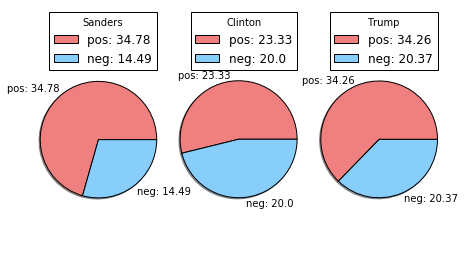

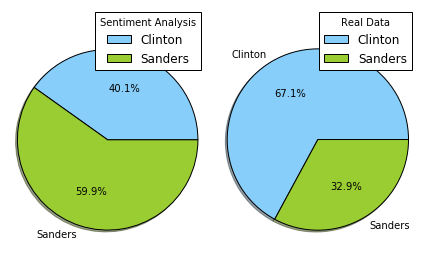

In [107]:
analysis('TN|Tennessee')

## Texas

People who talked about state TX|Texas: 3216
Sanders - Total: 386
Pos: 147, Neg: 64

Clinton - Total: 263
Pos: 84, Neg: 47

Trump - Total: 1626
Pos: 495, Neg: 356



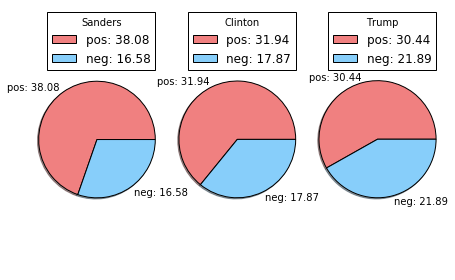

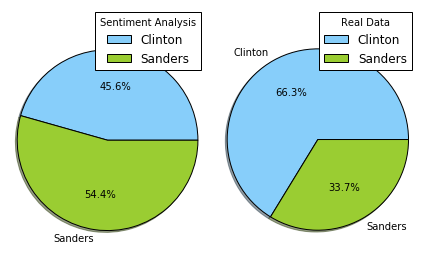

In [109]:
analysis('TX|Texas')

## Utah

People who talked about state UT|Utah: 292
Sanders - Total: 42
Pos: 19, Neg: 7

Clinton - Total: 17
Pos: 7, Neg: 1

Trump - Total: 154
Pos: 49, Neg: 30



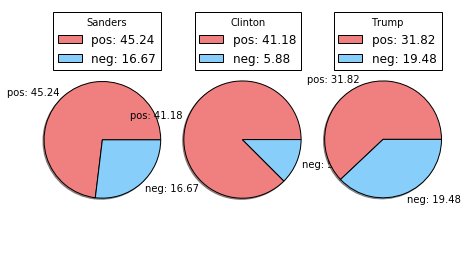

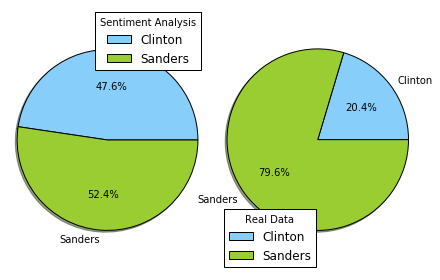

In [110]:
analysis('UT|Utah')

## Vermont

People who talked about state VT|Vermont: 177
Sanders - Total: 63
Pos: 17, Neg: 11

Clinton - Total: 12
Pos: 7, Neg: 0

Trump - Total: 49
Pos: 15, Neg: 13



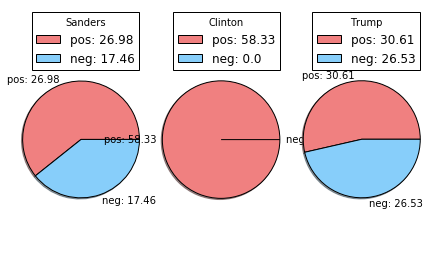

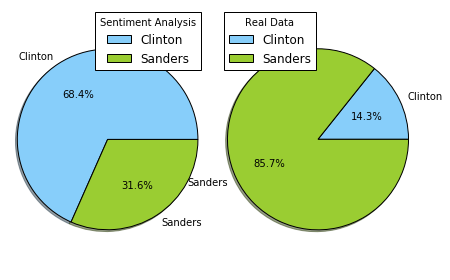

In [111]:
analysis('VT|Vermont')

## Virginia

People who talked about state VA|Virginia: 1029
Sanders - Total: 127
Pos: 46, Neg: 20

Clinton - Total: 78
Pos: 22, Neg: 19

Trump - Total: 511
Pos: 148, Neg: 113



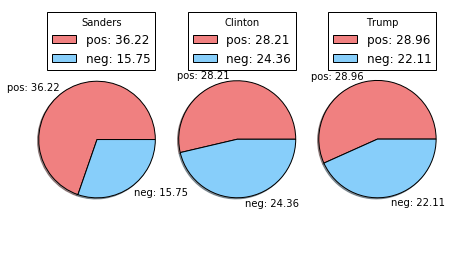

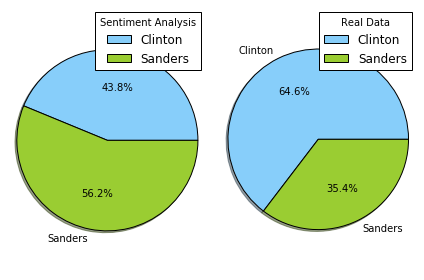

In [112]:
analysis('VA|Virginia')

## Washington

People who talked about state WA|Washington: 5246
Sanders - Total: 622
Pos: 232, Neg: 90

Clinton - Total: 430
Pos: 161, Neg: 65

Trump - Total: 2576
Pos: 839, Neg: 487



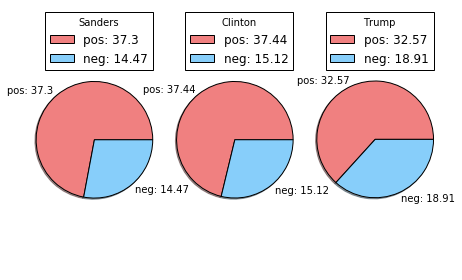

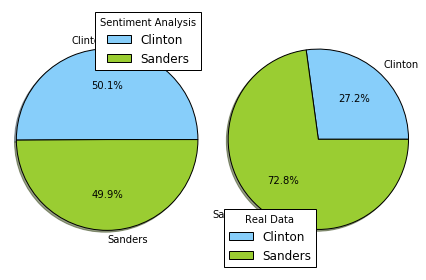

In [113]:
analysis('WA|Washington')

## Wisconsin

People who talked about state WI|Wisconsin: 529
Sanders - Total: 74
Pos: 24, Neg: 7

Clinton - Total: 39
Pos: 17, Neg: 6

Trump - Total: 248
Pos: 92, Neg: 48



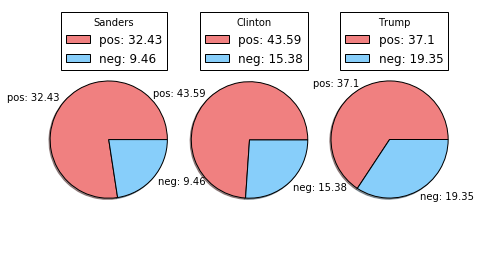

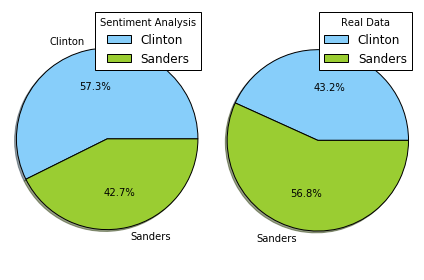

In [114]:
analysis('WI|Wisconsin')

## Wyoming

People who talked about state WY|Wyoming: 69
Sanders - Total: 14
Pos: 4, Neg: 2

Clinton - Total: 5
Pos: 2, Neg: 3

Trump - Total: 30
Pos: 15, Neg: 4



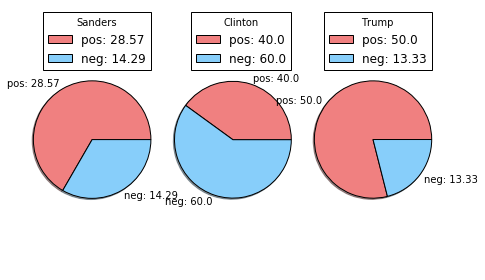

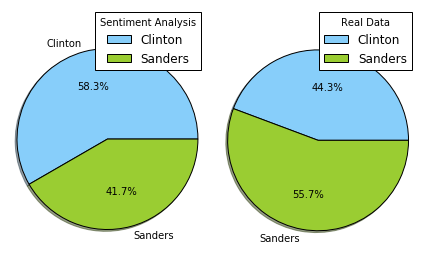

In [115]:
analysis('WY|Wyoming')